# Previsão de Classificação Tumor Cerebral

Neste projeto, construiremos um modelo de predição de tumores cerebrais, classificando-os como **benignos** ou **malignos**
Para o desenvolvimento do projeto, seguiremos o framework CRISP-DM com as seguintes etapas:
**1. Definição do problema**

**2. Coletar os dados**

**3. Realizar a Análise Exploratória dos Dados**

**4. Realizar o Pré-processamento dos dados**

**5. Visualizar de forma gráfica os dados pós processamento**

**6. Dividir os dados em conjuntos de treino e teste**

**7. Realizar a Engenharia de features**

**8. Treinamento do modelo, comparação, seleção de características e ajuste**

**9. Testar e avaliar o modelo final de produção**

**10. Implementação**

**Neste notebook, realizaremos até a etapa 5, Visualizar de forma gráfica os dados pós processados**

## **1. Definição do Problema**
Em hospitais, a detecção precisa do tipo de tumor cerebral é fundamental para definir o tratamento adequado e as chances de sucesso no tratamento. A incapacidade de classificar corretamente os tumores pode levar a tratamentos inadequados, impactando negativamente a saúde do paciente. Este projeto visa desenvolver um modelo preditivo capaz de classificar com precisão se o tumor é benigno ou maligno, ajudando os médicos a tomar decisões mais informadas e a personalizar os tratamentos para cada paciente

### **1.1 Contextualização do Problema**
Quando um paciente é diagnosticado com um tumor cerebral, é crucial classificar se ele é benigno ou maligno, pois isso determina diretamente o plano de tratamento. O objetivo desse projeto é fornecer uma ferramenta que permita essa classificação de maneira precisa, com base em características clínicas e exames realizados.

### **Quais são os objetivos principais do projeto?**
1. Classificar tumores cerebrais como beniginos ou malignos com base em dados clínicos
2. Desenvolver um modelo preditivo que ajude na determinação do tipo de tumor.

### **Quais são os Benefícios do projeto?**
1. **Diagnóstico mais rápido e preciso**: Facilita a decisão sobre o tratamento adequado de maneira ágil, especialmente em situações de emergência.
2. **Redução de custo**: Otimiza o processo de diagnóstico e evita tratamentos inadequados ou desnecessários.
3. **Aumento nas chances de sucesso de tratamento**: Ao detectar tumores malignos precocemente, as chances de sucesso no tratamento aumentam consideravelmente.
4. **Personalização do tratamento**: Permite que os médicos escolham abordagens mais específicas para o tipo de tumor.
5. **Proteção da saúde pública**: Melhora a qualidade do atendimento médico e reduz a mortalidade de pacientes diagnosticados com tumores malignos.

Com a implementação deste modelo preditivo, o hospital poderá oferecer diagnóstico mais rápidos e precisos, maximizando as chances de tratamento bem-sucedido.

# Importando as bibliotecas

In [5]:
import sys
import os

# Pega o diretório atual (onde o notebook está)
current_dir = os.getcwd()

# Adiciona o diretório raiz do projeto ao sys.path (subindo um nível)
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

#limpar cache
import importlib
import utils.preprocessing_class
importlib.reload(utils.preprocessing_class)

<module 'utils.preprocessing_class' from '/home/rafola/Documentos/ciencia_de_dados/brain_tumor/utils/preprocessing_class.py'>

In [6]:
import pickle


import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt #type: ignore
import scipy.stats as stats
from scipy.stats import normaltest
import plotly.express as px

# pre processamento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from utils.preprocessing_class import *

# 2. Coleta de Dados

Para este projeto, utilizaremos a base de dados **brain_tumor_dataset** contendo informações detalhadas dos tumores. Essa base inclui informações sobre histórico familiar dos pacientes, características dos pacientes com tumores, localização onde o tumor se encontra e outros fatores relevantes para a analise da taxa de sobrevivência

In [7]:
caminho_csv = '..//input//brain_tumor_dataset.csv'

if not os.path.exists(caminho_csv):
    print('Arquivo não encontrado!')
else:
    pd.set_option('display.max_columns', None) #mostra todas as colunas sem cortar
    tumor_df = pd.read_csv(caminho_csv)

# 3. Análise Exploratória dos Dados

Nesta seção, realizaremos a análise os dados relacionados aos tumores cerebrais, com o objetivo de compreender e entender as informações fornecidas à equipe. Além disso, buscaremos identificar as etapas e técnicas que serão aplicadas no pré-processamento dos dados.

In [8]:
tumor_df.head(3)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No


In [9]:
tumor_df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

In [10]:
tumor_df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

**DICIONÁRIO DOS DADOS**
________________________________________________________________________________
**Patient_ID** : ID do paciente - int64



**Age** : idade do paciente - int64



**Gender** : gênero do paciente - object



**Tumor_Type** : Tipo do tumor (maligno ou benigno) - object **(target)**



**Tumor_Size** : Tamanho do tumor no cérebro - float64



**Location** : Localização do tumor - object



**Histology** : Tipo de histologia do tumor - object



**Stage** : Estágio do tumor - object



**Symptom_1** : Sintomas apresentados pelo paciente I - object



**Symptom_2** : Sintomas apresentados pelo paciente II - object



**Symptom_3** : Sintomas apresentados pelo paciente III - object



**Radiation_Treatment** : Indica se o paciente recebeu tratamento com radiação - object



**Surgery_Performed** : Indica se o paciente passou por cirurgia para remoção do tumor - object



**Chemotherapy** : Indica se o paciente recebeu quimioterapia - object



**Survival_Rate** : Taxa de Sobrevivência - float64



**Tumor_Growth_Rate** : Taxa de crescimento do tumor (para entender a agressividade da doença) - float64



**Family_History** : Histórico familiar com tumores - object



**MRI_Result** : Resultado da ressonância - object



**Follow_Up_Required** : Indica se o paciente precisa de acompanhamento contínuo - object



In [11]:
tumor_df['Tumor_Type'].value_counts()

Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64

In [12]:
tumor_df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [13]:
tumor_df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [14]:
tumor_df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

In [15]:
tumor_df['MRI_Result'].value_counts()

MRI_Result
Positive    10029
Negative     9971
Name: count, dtype: int64

In [16]:
total = len(tumor_df)
mri_positive = len(tumor_df[tumor_df['MRI_Result'] == 'Positive'])
mri_negative = (mri_positive / total) * 100
mri_negative = round(mri_negative, 2)
print(f'Taxa de negativos da ressoância: {mri_negative}%')

Taxa de negativos da ressoância: 50.14%


**MRI**
Embora a ressonância magnética (MRI) seja um exame altamente sensível e específico, apresentamos uma taxa considerável de falsos negativos, onde o exame não identificou tumores presentes nos pacientes. Possíveis explicações para isso incluem o tamanho, tipo e localização do tumor, fatores que podem dificultar a detecção em alguns casos. Vamos realizar uma análise adicional para investigar se a MRI, apesar desses desafios, desempenha um papel significativo no nosso modelo de diagnóstico.


In [17]:
tumor_df['Location'].value_counts()

Location
Temporal     5118
Parietal     4990
Occipital    4967
Frontal      4925
Name: count, dtype: int64

É possível verificar que os dados de início já estão bem tratados, não existindo valores nulos e nemhum dados faltantes.


fomos atrás do balanceamento da target e o retorno que obtivemos é de que os dados estão bem balanceados. Sendo assim não teremos que aplicar nenhuma tecnica de balanceamento.


*Dados desbalanceados tendem a levar o modelo a prever de forma majoritária para a classe com maior quantidade de exemplos. Por exemplo: maligno: 50 | benigno: 10000*

In [18]:
tumor_df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835


- **Verificação de Ouliters**

In [19]:
numerical = tumor_df.select_dtypes(['int64', 'float64'])
numerical = numerical.drop(columns='Patient_ID')

In [20]:
numerical.columns

Index(['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate'], dtype='object')

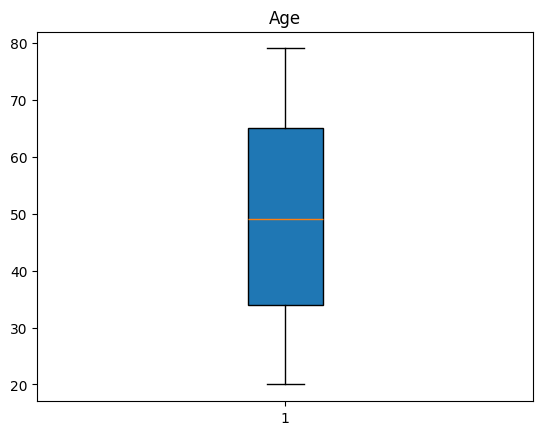

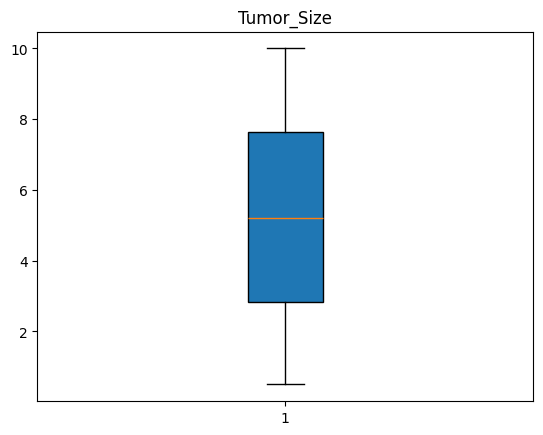

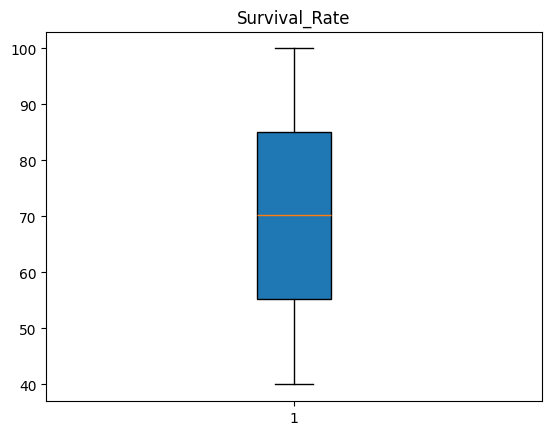

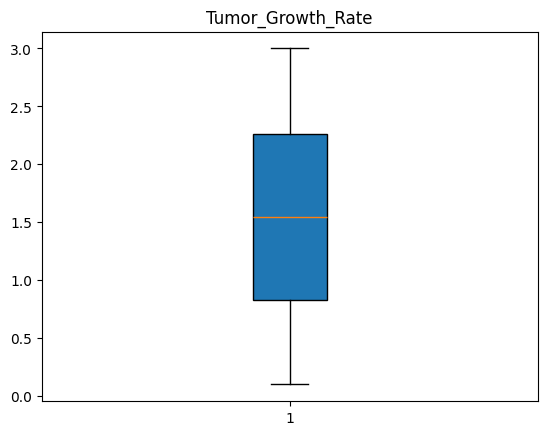

In [21]:
for col in numerical.columns:
  plt.boxplot(numerical[col], vert=True, patch_artist=True)
  plt.title(col)
  plt.show()

Após a análise do gráfico de boxplot, observamos que não há presença de outliers nas variáveis analisadas. Isso sugere que os dados estão distribuídos de maneira relativamente uniforme, sem valores extremos que possam distorcer a análise ou o treinamento do modelo. Essa ausência de outliers pode indicar que o pré-processamento de dados já está bem equilibrado, ou que as variáveis estão dentro de uma faixa de valores esperada para o contexto do problema.

In [22]:
media = numerical.mean()
std = numerical.std()

#Coeficiente de Variação(cv)
cv = (std/media) * 100
cv = round(cv, 2)
cv

Age                  35.18
Tumor_Size           52.60
Survival_Rate        24.63
Tumor_Growth_Rate    54.02
dtype: float64

- **Age:**

  * A variável idade apresenta um coeficiente de variação de 35.18%, indicando uma variabilidade moderada, mas ainda significativa, o que pode sugerir diferenças relevantes entre faixas etárias.

- **Tumor_size:**

    * O coeficiente de variação indica que os tamanhos dos tumores apresentam alta variabilidade, sugerindo que há uma grande dispersão dos dados em relação à média.

- **Survival_rate:**

    * Com um coeficiente de variação de aproximadamente 25%, a taxa de sobrevivência apresenta uma variabilidade moderada, indicando que os valores não se afastam drasticamente da média.

- **Tumor_Growth_Rate:**

    * A taxa de crescimento do tumor possui um coeficiente de variação de 54%, o que indica uma alta variabilidade dos dados em relação à média

- **Conclusão**

    * *Os dados numéricos apresentam variações significativas, sugerindo a necessidade de normalização ou padronização no pré-processamento. O método mais adequado será escolhido conforme os requisitos do modelo preditivo.*

- **verificando a normalidade das variáveis numericas**

*Para o teste de normalidade dos atributos numéricos, é necessário importar de `scipy.stats` o `normaltest`*

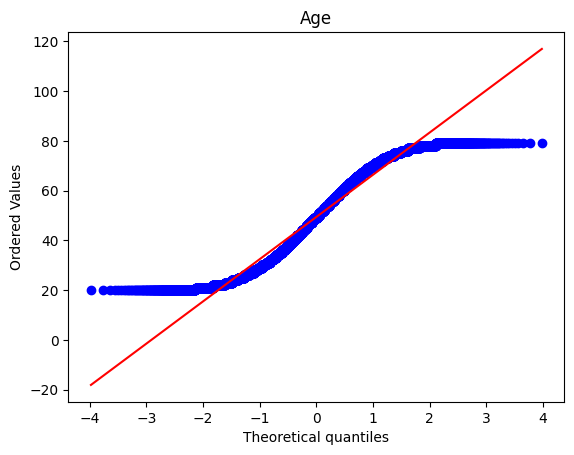

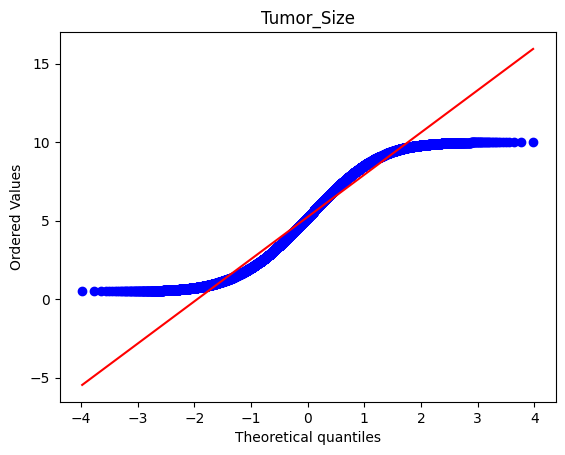

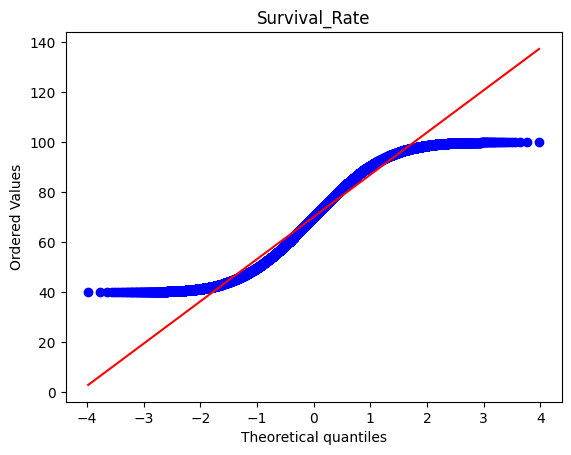

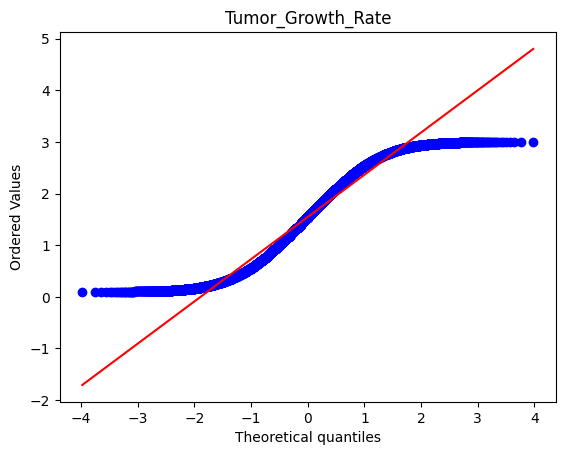

In [23]:
for col in numerical:
  stats.probplot(tumor_df[col], dist='norm', plot=plt)
  plt.title(col)
  plt.show()
  # Se os pontos estiverem alinhados com a linha diagonal, os dados são aproximadamente normais.

In [24]:
for col in numerical:
    stat, p = normaltest(tumor_df[col])
    print(f"Coluna: {col} | Estatística={stat:.4f}, p-valor={p:.4f}\n")

    if p < 0.05:
        print(f"- A coluna '{col}' **NÃO** segue uma distribuição normal (p < 0.05).\n\n")
    else:
        print(f"-  A coluna '{col}' parece seguir uma distribuição normal (p >= 0.05).\n\n")

Coluna: Age | Estatística=18254.0629, p-valor=0.0000

- A coluna 'Age' **NÃO** segue uma distribuição normal (p < 0.05).


Coluna: Tumor_Size | Estatística=17540.4516, p-valor=0.0000

- A coluna 'Tumor_Size' **NÃO** segue uma distribuição normal (p < 0.05).


Coluna: Survival_Rate | Estatística=16135.6223, p-valor=0.0000

- A coluna 'Survival_Rate' **NÃO** segue uma distribuição normal (p < 0.05).


Coluna: Tumor_Growth_Rate | Estatística=14990.2253, p-valor=0.0000

- A coluna 'Tumor_Growth_Rate' **NÃO** segue uma distribuição normal (p < 0.05).




Com o **Gráfico Q-Q (Quantile-Quantile Plot)** e o teste de **D'Agostino-Pearson**, podemos verificar se os dados seguem uma distribuição normal. Como nossos testes indicam que os dados **não** são normais, podemos escolher a melhor técnica de escalonamento para o pré-processamento.

Para modelos baseados em distância, como **KNN**, **SVM** e **Redes Neurais**, utilizaremos o `Min-Max Scaling`, pois ele mantém os dados dentro de um intervalo fixo e melhora a convergência do modelo.

Iremos normalizar os dados desde o início, garantindo que, caso utilizemos **Redes Neurais**, o pré-processamento já estará adequado.

________________________________________________________________________________

In [25]:
for col in numerical.columns:
    fig = px.histogram(numerical, x= numerical[col], nbins=10, title=f'histograma da feature {col}')
    fig.show()

- **Analisando as Variáveis Categóricas**

In [26]:
categorical_columns = tumor_df.select_dtypes('object')

In [27]:
categorical_columns

,Gender,Tumor_Type,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Family_History,MRI_Result,Follow_Up_Required
0,Male,Malignant,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,No,Positive,Yes
1,Male,Benign,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,Yes,Positive,Yes
2,Male,Benign,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,No,Negative,No
3,Male,Malignant,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,Yes,Negative,No
4,Female,Benign,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Male,Malignant,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,No,Negative,Yes
19996,Female,Benign,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,No,Positive,No
19997,Female,Benign,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,No,Positive,Yes
19998,Male,Malignant,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,No,Positive,No


In [28]:
categorical_columns['Location'].value_counts()

Location
Temporal     5118
Parietal     4990
Occipital    4967
Frontal      4925
Name: count, dtype: int64

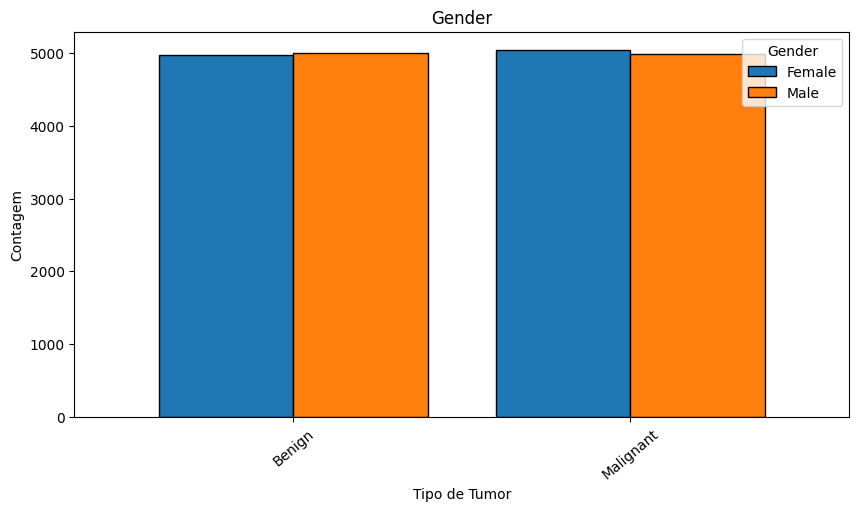

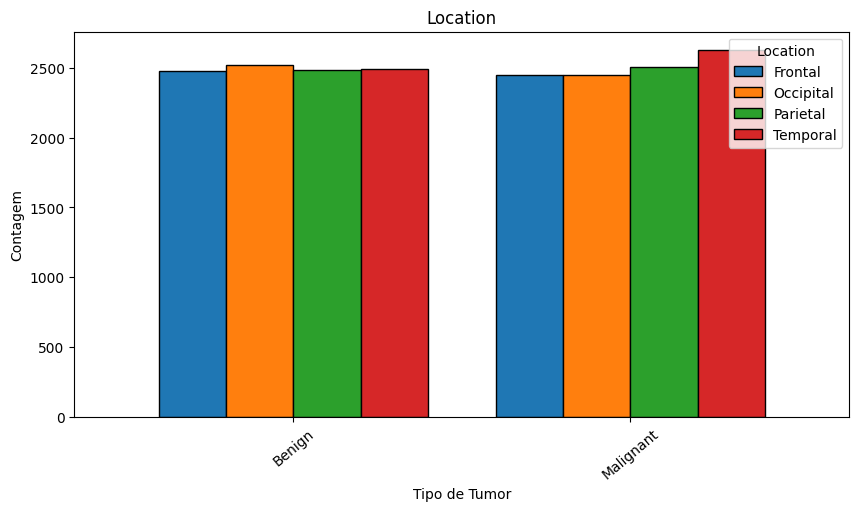

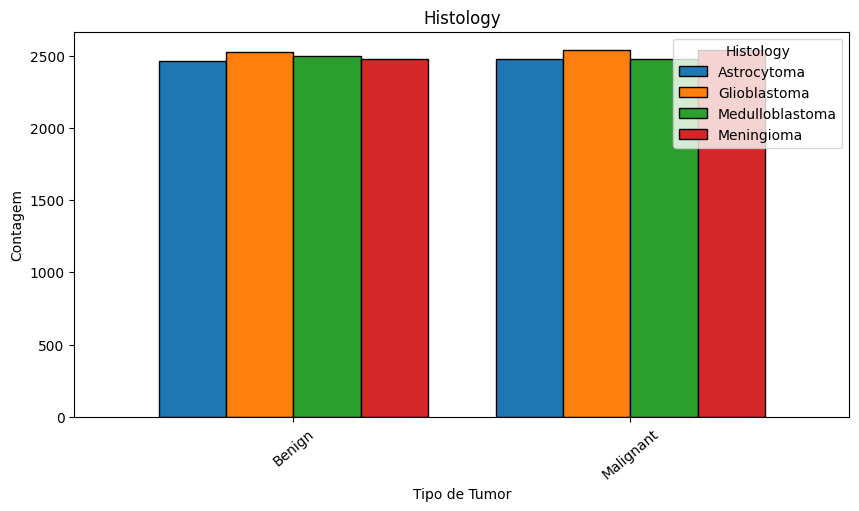

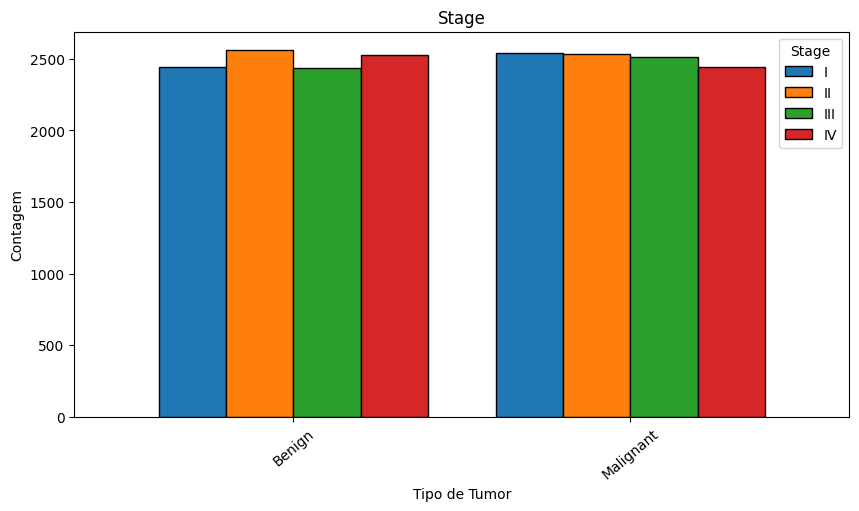

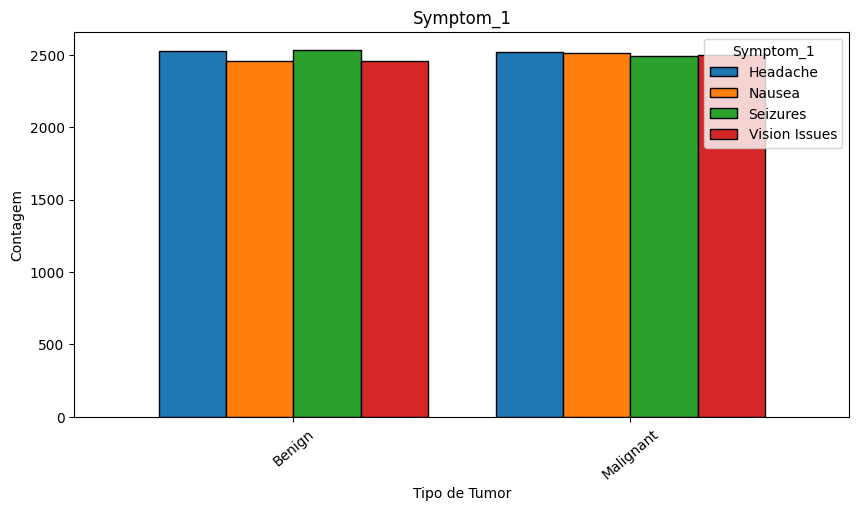

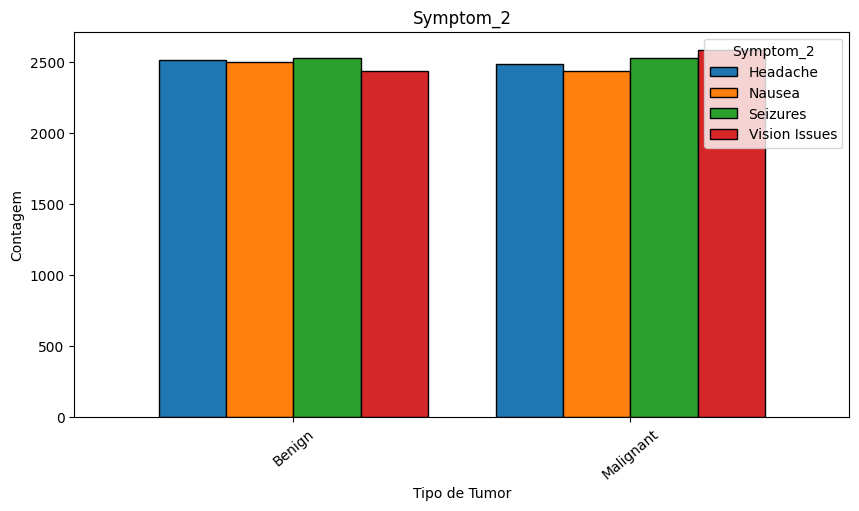

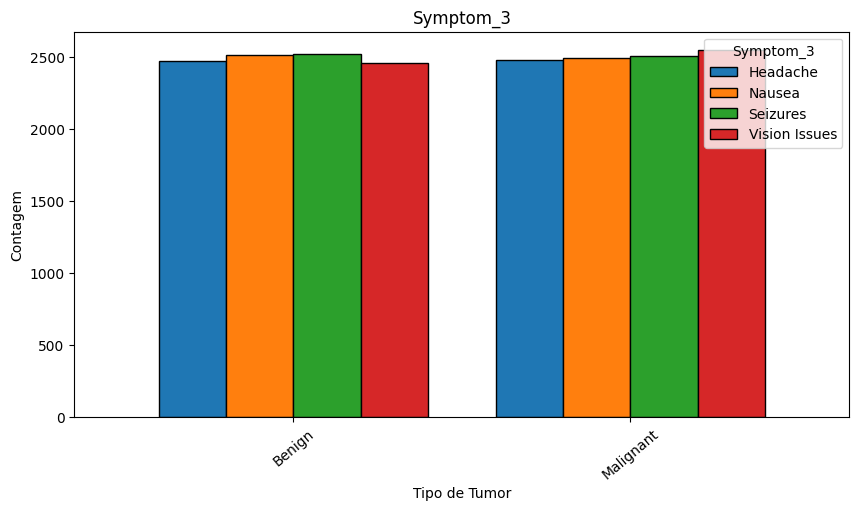

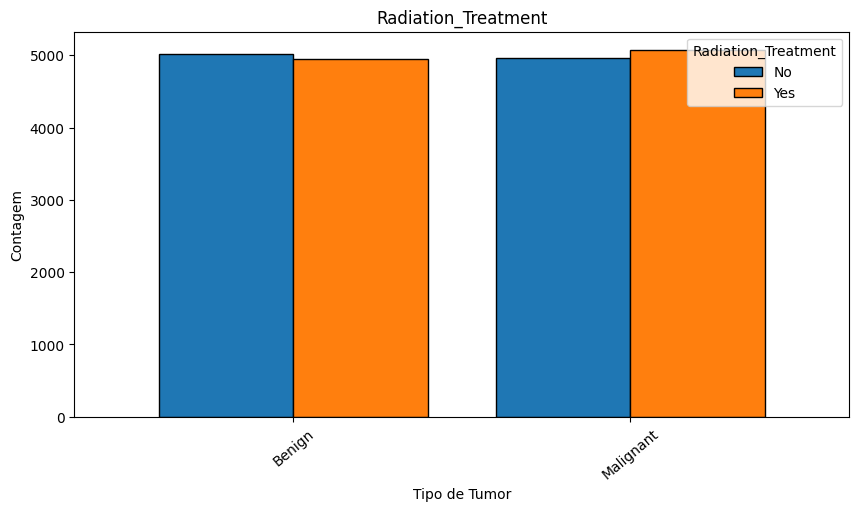

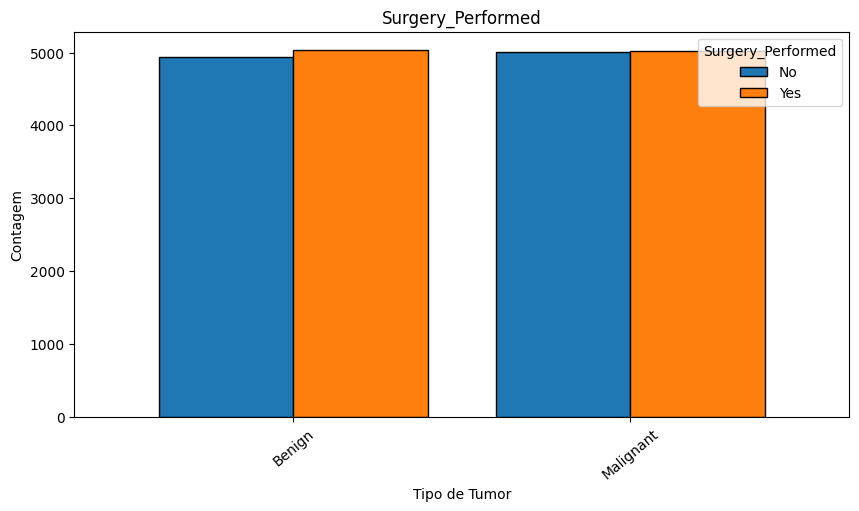

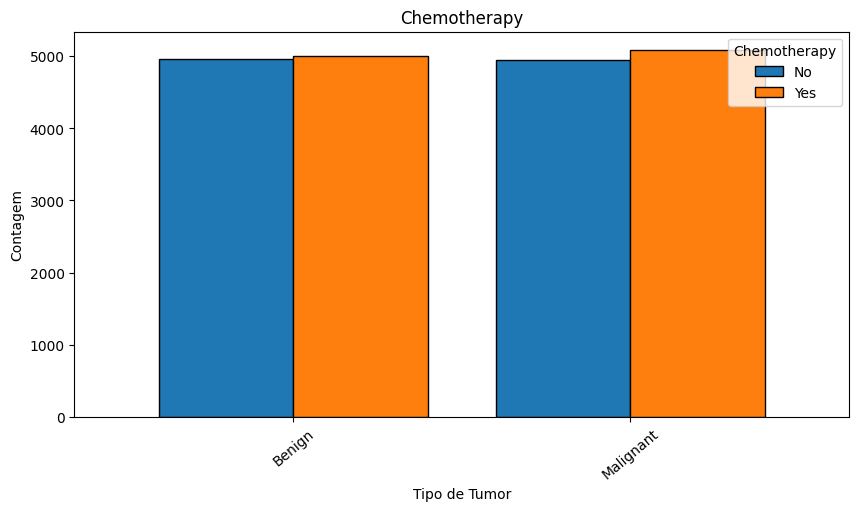

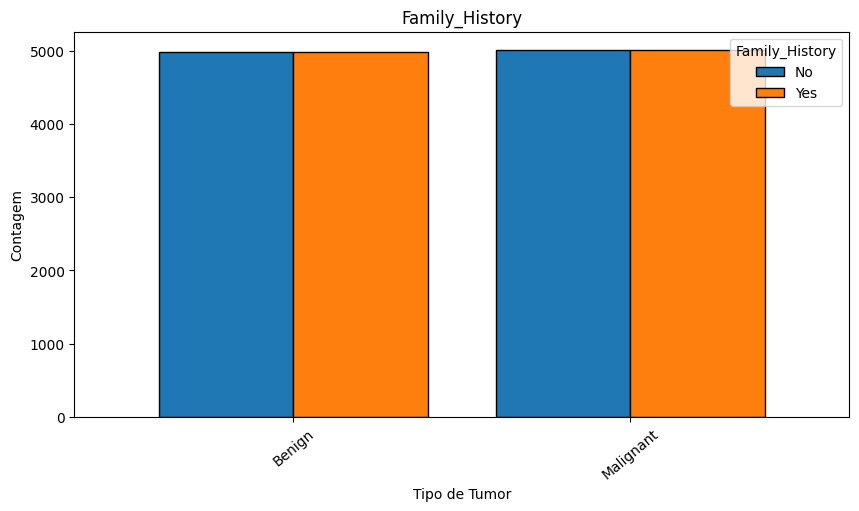

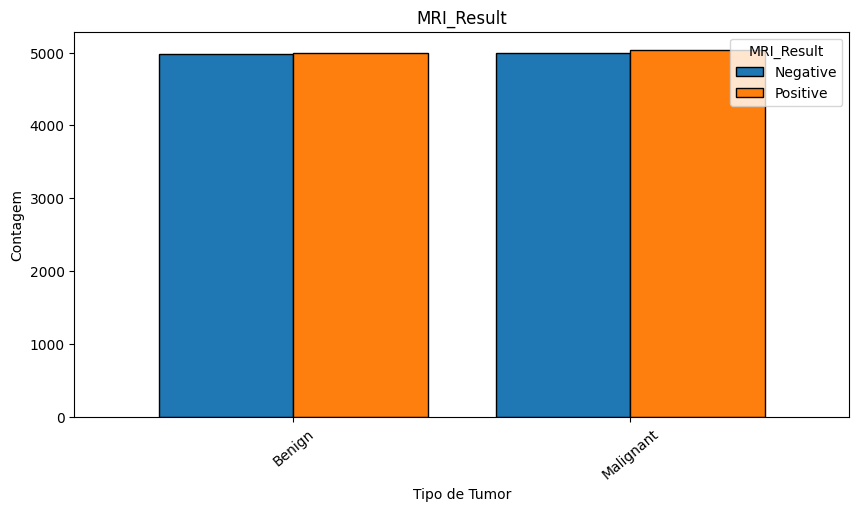

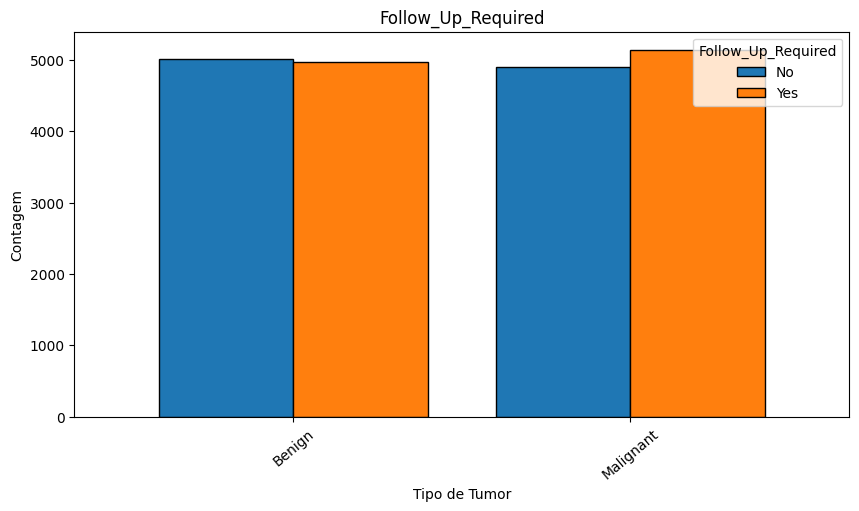

In [29]:
max_count = 0
for col in categorical_columns.columns:
    if col == 'Tumor_Type':
        continue
    max_count = max(max_count, categorical_columns[col].value_counts().max())

for col in categorical_columns.columns:
    if col == 'Tumor_Type':
        continue

    plt.figure(figsize=(10, 5))
    counts = categorical_columns.groupby("Tumor_Type")[col].value_counts().unstack()
    counts.plot(kind="bar", edgecolor="black", width=0.8, ax=plt.gca())

    plt.title(col)
    plt.xlabel("Tipo de Tumor")
    plt.ylabel("Contagem")
    plt.xticks(rotation=40)
    plt.legend(title=col)

    # Ajustar a escala do eixo Y para manter todos proporcionais
    plt.ylim()

    plt.show()

Com o gráfico de barras, podemos entender melhor as variáveis categóricas, identificando quais são nominais e quais são ordinais. Dessa forma, podemos aplicar a técnica mais adequada de pré-processamento, como `label encoding`, `one-hot encoding` ou `ordinal encoding`, dependendo do tipo de variável.

Podemos ver que o `Stage` é o **único atributo ordina**l *(com uma ordem natural entre seus valores)*, por isso, aplicaremos o `Ordinal Encoding` nele. Para as demais **variáveis nominais**, aplicaremos o `One-Hot Encoding`.

In [30]:
for col in categorical_columns.columns:
    counts = categorical_columns[col].value_counts()
    variance = np.var(counts.values)
    print(f"Variância da variável {col}: {variance}")

Variância da variável Gender: 256.0
Variância da variável Tumor_Type: 900.0
Variância da variável Location: 5184.5
Variância da variável Histology: 2322.5
Variância da variável Stage: 3019.5
Variância da variável Symptom_1: 1383.5
Variância da variável Symptom_2: 2013.5
Variância da variável Symptom_3: 759.5
Variância da variável Radiation_Treatment: 441.0
Variância da variável Surgery_Performed: 3600.0
Variância da variável Chemotherapy: 9409.0
Variância da variável Family_History: 4.0
Variância da variável MRI_Result: 841.0
Variância da variável Follow_Up_Required: 10201.0


- **Gender:**

  * A variância da variável Gender é relativamente alta, o que indica que há uma distribuição desigual das categorias (provavelmente uma quantidade significativamente maior de uma das classes). Isso pode sugerir que o gênero dos pacientes não está equilibrado, com mais observações para um dos gêneros, o que deve ser considerado ao treinar o modelo.

- **Tumor_Type:**

    * A variância na variável Tumor_Type é significativa, o que sugere que os tipos de tumor na base de dados estão relativamente bem distribuídos. No entanto, a alta variância também pode indicar que o número de pacientes em cada tipo de tumor não é balanceado e que alguns tipos de tumor têm uma quantidade muito maior de amostras que outros.

- **Location:**

    * A variável Location apresenta uma alta variância, indicando que há uma grande diversidade nos locais em que os pacientes foram diagnosticados. Isso sugere que a variável Location pode ter uma grande distribuição de categorias, o que pode ter impacto na análise e no modelo preditivo, já que pode haver locais com um número muito maior de casos.

- **Histology:**

    * A variância da variável Histology também é alta, o que sugere que existem muitas categorias diferentes na distribuição das observações. Isso pode indicar uma diversidade de tipos histológicos entre os pacientes, o que também pode afetar o modelo de forma considerável.

- **Stage:**

    * A variância da variável Stage é alta, sugerindo que as diferentes fases do tumor estão distribuídas de forma desigual. Isso pode afetar a capacidade do modelo de aprender com equilíbrio, já que algumas fases podem ter mais ou menos representatividade na base de dados.

- **Symptom_1, Symptom_2, Symptom_3:**

    * As variâncias dessas variáveis sugerem que a distribuição dos sintomas entre os pacientes é bastante variada. Isso pode ser um reflexo de que diferentes pacientes possuem diversos sintomas, com alguns sintomas ocorrendo com mais frequência do que outros. A variabilidade dessas variáveis pode precisar de um tratamento especial durante o pré-processamento, como codificação ou agrupamento de sintomas semelhantes.

- **Radiation_Treatment:**

    * A variância é moderada, indicando que há uma distribuição razoavelmente balanceada entre os pacientes que receberam e os que não receberam tratamento de radiação. A variável Radiation_Treatment pode ser importante para a análise, mas a variabilidade não é tão alta quanto em outras variáveis.

- **Surgery_Performed:**

    * A variável Surgery_Performed apresenta uma alta variância, sugerindo que o número de pacientes que passaram por cirurgia é consideravelmente diferente entre as categorias. Isso pode indicar uma diversidade de tratamentos entre os pacientes, com muitos que realizaram a cirurgia e outros que não.

- **Chemotherapy:**

    * A variância extremamente alta sugere que a distribuição dos pacientes que passaram por quimioterapia é bastante desequilibrada. A alta variância pode indicar que um número significativo de pacientes recebeu tratamento, enquanto outro número considerável não o fez.

- **Family_History:**

    * A variância da variável Family_History é bem baixa, o que indica que a maioria dos pacientes tem ou não tem histórico familiar de câncer, com uma distribuição mais concentrada em uma das categorias. Essa baixa variância pode significar uma característica importante, mas com pouca diversidade.

- **MRI_Result:**

    * A variância de MRI_Result sugere que os resultados de ressonância magnética dos pacientes estão distribuídos de forma desigual. Isso pode indicar que a maioria dos pacientes tem um resultado positivo ou negativo, com uma pequena variação no meio.

- **Follow_Up_Required:**

    * A variância extremamente alta em Follow_Up_Required sugere que há uma grande disparidade entre os pacientes que precisam de acompanhamento e os que não precisam. Essa variável pode estar fortemente desequilibrada, e os dados precisam ser analisados com cuidado durante a modelagem.

- **Conclusão sobre as variáveis categóricas:**

    * *As variáveis categóricas apresentam uma alta variabilidade em muitas delas, o que pode indicar um desequilíbrio nas categorias. Isso pode ser um desafio para modelos que dependem de distribuições mais balanceadas.*

    * *Algumas variáveis (como Family_History e Follow_Up_Required) apresentam baixa variância, o que pode indicar que a maioria dos pacientes compartilha uma característica comum, enquanto outras (como Chemotherapy e Tumor_Type) mostram grande disparidade nas categorias.*
    
    * *Esse desequilíbrio nas variáveis pode exigir técnicas de balanceamento de classes, como undersampling/oversampling, ou o uso de técnicas específicas para lidar com variáveis desbalanceadas durante o pré-processamento e treinamento do modelo.*

In [31]:
categorical_columns.describe()

,Gender,Tumor_Type,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Family_History,MRI_Result,Follow_Up_Required
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,2,2,4,4,4,4,4,4,2,2,2,2,2,2
top,Female,Malignant,Temporal,Glioblastoma,II,Headache,Seizures,Seizures,Yes,Yes,Yes,No,Positive,Yes
freq,10016,10030,5118,5068,5093,5045,5054,5027,10021,10060,10097,10002,10029,10101


In [32]:
for value in categorical_columns.columns:
  display(categorical_columns[value].value_counts())

Gender
Female    10016
Male       9984
Name: count, dtype: int64

Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64

Location
Temporal     5118
Parietal     4990
Occipital    4967
Frontal      4925
Name: count, dtype: int64

Histology
Glioblastoma       5068
Meningioma         5016
Medulloblastoma    4979
Astrocytoma        4937
Name: count, dtype: int64

Stage
II     5093
I      4986
IV     4968
III    4953
Name: count, dtype: int64

Symptom_1
Headache         5045
Seizures         5028
Nausea           4969
Vision Issues    4958
Name: count, dtype: int64

Symptom_2
Seizures         5054
Vision Issues    5019
Headache         4996
Nausea           4931
Name: count, dtype: int64

Symptom_3
Seizures         5027
Nausea           5012
Vision Issues    5007
Headache         4954
Name: count, dtype: int64

Radiation_Treatment
Yes    10021
No      9979
Name: count, dtype: int64

Surgery_Performed
Yes    10060
No      9940
Name: count, dtype: int64

Chemotherapy
Yes    10097
No      9903
Name: count, dtype: int64

Family_History
No     10002
Yes     9998
Name: count, dtype: int64

MRI_Result
Positive    10029
Negative     9971
Name: count, dtype: int64

Follow_Up_Required
Yes    10101
No      9899
Name: count, dtype: int64

# 4. Pré-Processamento dos Dados

Como vimos na **Análise Exploratória dos Dados**, a base de dados não precisará passar por muitas alterações, como o tratamento de valores ausentes ou números faltantes. Observamos que os dados precisam ser **padronizados/normalizados** e que será necessário **transformar** as variáveis **categóricas** em **numéricas**.
1. Separar as variáveis indepentes da dependente
2. Aplicar o Label ou Ordinal Encoder na variável target (Tumor_Type)
2. Aplicar a normalização das variáveis numéricas
3. Aplicar o OneHot Encoder nas demais variáveis categóricas
4. formatar as valiarveis como float para terem apenas 2 valores após a casa decimal

In [33]:
tumor_df = tumor_df.drop('Patient_ID', axis=1)

In [34]:
X_tumor = tumor_df.drop('Tumor_Type', axis=1)
y_tumor = tumor_df.Tumor_Type

In [35]:
X_tumor.shape

(20000, 17)

In [36]:
numerical_columns = X_tumor.select_dtypes(include='number').columns
numerical_columns = numerical_columns.drop('Survival_Rate')
min_scaler = CustomMinMaxScaler()
X_tumor[numerical_columns] = min_scaler.fit_transform(X_tumor[numerical_columns])

In [37]:
X_tumor

,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,0.898305,Male,0.513233,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.004090,No,Positive,Yes
1,0.101695,Male,0.457594,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,0.712361,Yes,Positive,Yes
2,0.186441,Male,0.535633,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,0.615284,No,Negative,No
3,0.152542,Male,0.098557,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,0.408069,Yes,Negative,No
4,0.576271,Female,0.201821,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,0.679167,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.016949,Male,0.959216,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.087519,No,Negative,Yes
19996,0.203390,Female,0.109817,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,0.772827,No,Positive,No
19997,0.627119,Female,0.328268,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,0.770001,No,Positive,Yes
19998,0.813559,Male,0.844159,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,0.788734,No,Positive,No


Como discutido na *análise exploratória*, optamos por **normalizar** os dados, pois, com o teste de **D'Agostino-Pearson** e o **Gráfico Q-Q**, observamos que as *variáveis numéricas* **não** seguem uma distribuição normal. Para o nosso projeto, caso utilizemos **Redes Neurais**, será importante normalizar os dados, *já que esse modelo é sensível à escala e à distribuição dos dados, o que pode melhorar a convergência e o desempenho*.

**Acabamos não normalizando os dados do ``Survival_Rate``, pois analisaremos melhor se iremos aproveitar o mesmo ou não**

In [38]:
label_encoder = CustomLabelEncoder()
X_tumor['Stage'] = label_encoder.fit_transform(X_tumor['Stage'])

In [39]:
X_tumor.dtypes

Age                    float64
Gender                  object
Tumor_Size             float64
Location                object
Histology               object
Stage                    int64
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

**Como o Stage do X_tumor é um valor orginal, que tem uma sequência, aplicamos o Label Encoder para que ele seja convertido para numerico e permaneça na mesma variável**

In [40]:
X_tumor['Survival_Rate'] = X_tumor['Survival_Rate'].astype(int)

- **Iremos selecionar apenas as variáveis categóricas para aplicar as devidas transformações**

In [41]:
categorical_X = X_tumor.select_dtypes(include='object')

In [42]:
categorical_X = categorical_X.columns

In [43]:
onehot_encoder = CustomOneHotEncoder(sparse_output=False)
X_Tumor_encoded = onehot_encoder.fit_transform(X_tumor[categorical_X])

In [44]:
encoded_columns = onehot_encoder.get_feature_names_out(categorical_X)

In [45]:
numerical = X_tumor.select_dtypes(exclude=['object'])

In [46]:
X_tumor = pd.DataFrame(X_Tumor_encoded, columns=encoded_columns)

In [47]:
X_tumor = pd.concat([X_tumor, numerical.reset_index(drop=True)], axis=1)

In [48]:
X_tumor['Survival_Rate'].value_counts().sort_values(ascending=True)

Survival_Rate
43    294
55    301
81    301
98    303
65    307
86    311
47    313
44    316
77    317
62    318
87    318
63    319
52    321
96    322
60    324
80    324
46    325
79    326
51    327
74    327
49    327
93    328
50    328
58    328
61    329
88    331
90    331
42    331
76    333
67    333
66    334
45    336
40    336
69    336
53    337
95    337
94    338
84    338
75    339
64    339
85    342
56    344
78    344
92    344
48    345
72    346
57    347
59    347
41    348
91    349
71    350
97    350
83    351
99    351
54    353
89    357
82    358
68    359
73    366
70    366
Name: count, dtype: int64

In [49]:
X_tumor.head()

,Gender_Male,Location_Frontal,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Astrocytoma,Histology_Glioblastoma,Histology_Medulloblastoma,Histology_Meningioma,Symptom_1_Headache,Symptom_1_Nausea,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes,Age,Tumor_Size,Stage,Survival_Rate,Tumor_Growth_Rate
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.898305,0.513233,2,51,0.004090
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.101695,0.457594,1,46,0.712361
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186441,0.535633,0,47,0.615284
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.152542,0.098557,3,51,0.408069
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.576271,0.201821,0,54,0.679167


Feito os devidos tratamentos agora poderemos ver o balancemaneto das variáveis, identificar também se existe fortes correlações entre as variáveis independes para que assim possamos tirar de nossos dados. analisar também as possíveis correlações que as variáveis independentes tem em realação com a variável target (Turmo_Type) e partir para a processa etapa do projeto que será a parte da **Egenharia de Features**

In [50]:
y_tumor = label_encoder.fit_transform(y_tumor)

Com o label_encoder ele retorna o alvo como numpy, existe processos para transformar novamente em DataFrame, porém preferimos deixar dessa forma para a modelagem

In [51]:
y_tumor

array([1, 0, 0, ..., 0, 1, 0], shape=(20000,))

In [61]:
# Caminho do arquivo
caminho = 'pkl/preprocessing.pkl'

# Salvar os dados
with open(caminho, "wb") as arquivo:
    pickle.dump((X_tumor, y_tumor), arquivo)

# Verificar se o arquivo foi gravado corretamente
if os.path.getsize(caminho) > 0:
    print("Dados gravados com sucesso!")
else:
    print("Falha ao gravar os dados!")

Dados gravados com sucesso!


Salvamos o ``X_tumor`` e o ``y_tumor`` para serem utilizados na area de modelagem

**Maligno - 0**

**Benigno - 1**

# 5. Visualização dos Dados pós processamento

In [53]:
X_tumor.columns

Index(['Gender_Male', 'Location_Frontal', 'Location_Occipital',
       'Location_Parietal', 'Location_Temporal', 'Histology_Astrocytoma',
       'Histology_Glioblastoma', 'Histology_Medulloblastoma',
       'Histology_Meningioma', 'Symptom_1_Headache', 'Symptom_1_Nausea',
       'Symptom_1_Seizures', 'Symptom_1_Vision Issues', 'Symptom_2_Headache',
       'Symptom_2_Nausea', 'Symptom_2_Seizures', 'Symptom_2_Vision Issues',
       'Symptom_3_Headache', 'Symptom_3_Nausea', 'Symptom_3_Seizures',
       'Symptom_3_Vision Issues', 'Radiation_Treatment_Yes',
       'Surgery_Performed_Yes', 'Chemotherapy_Yes', 'Family_History_Yes',
       'MRI_Result_Positive', 'Follow_Up_Required_Yes', 'Age', 'Tumor_Size',
       'Stage', 'Survival_Rate', 'Tumor_Growth_Rate'],
      dtype='object')

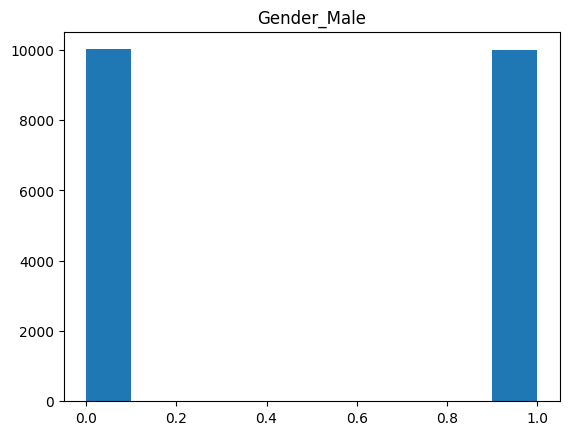

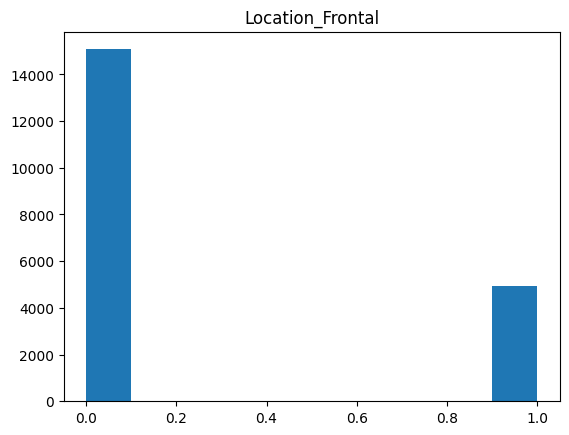

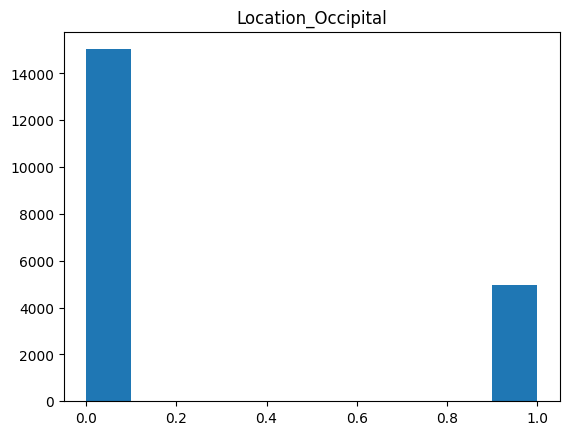

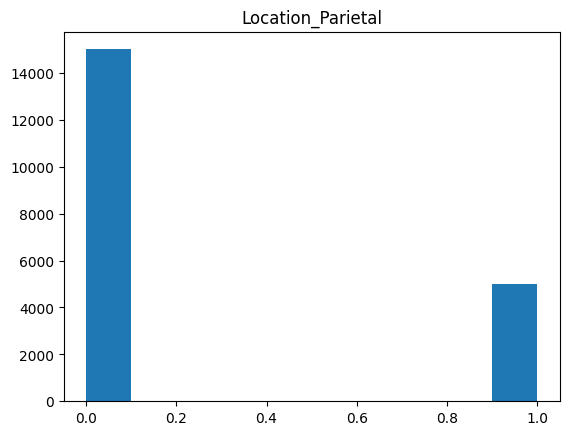

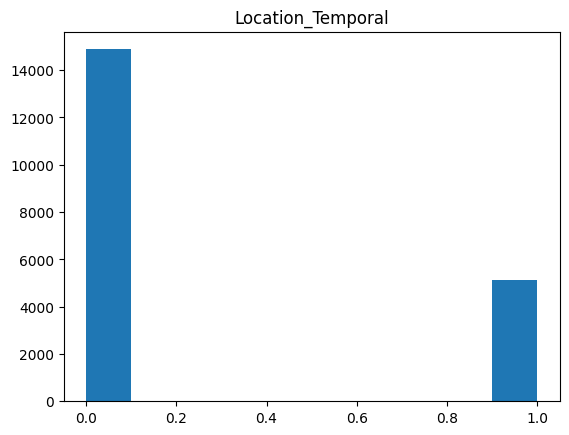

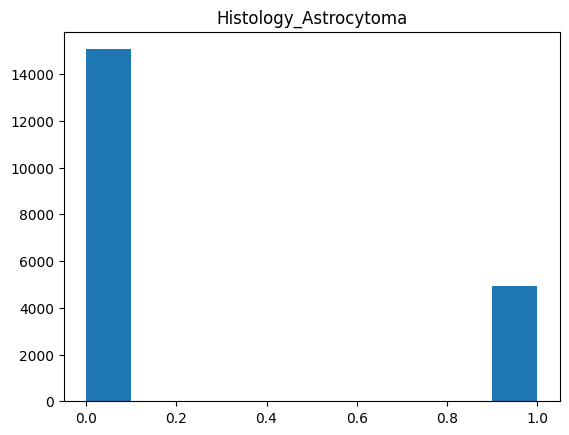

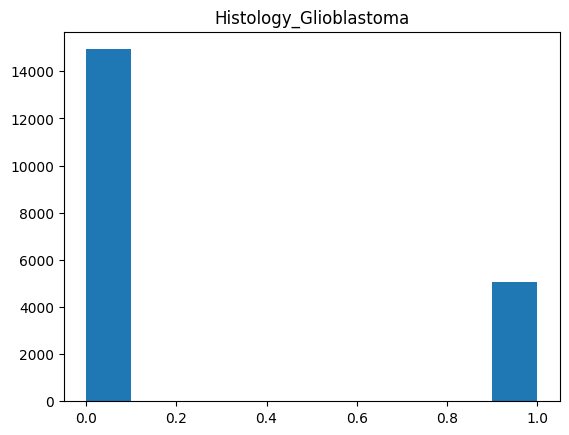

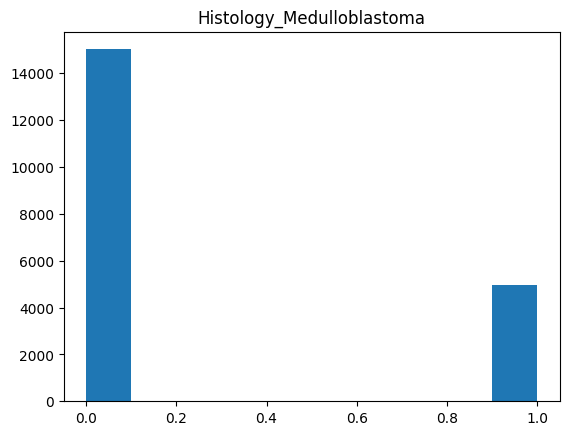

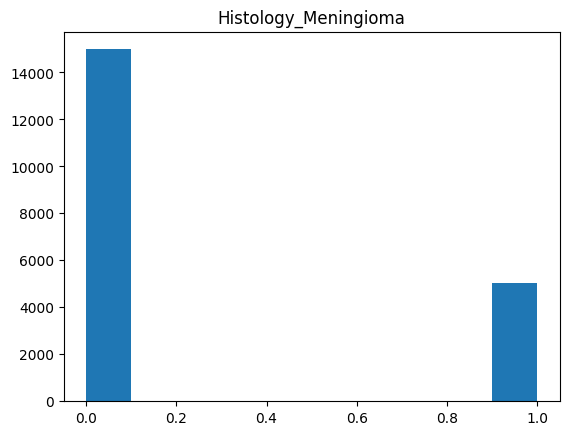

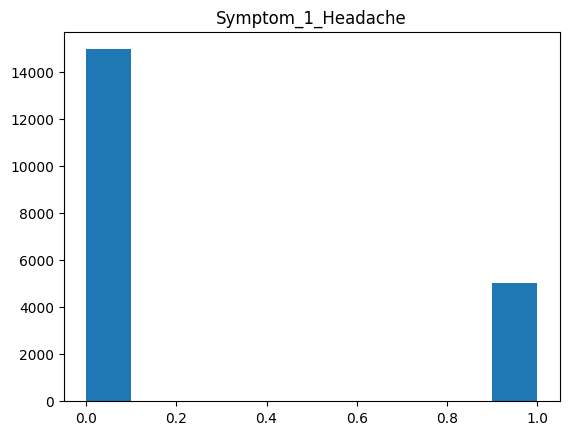

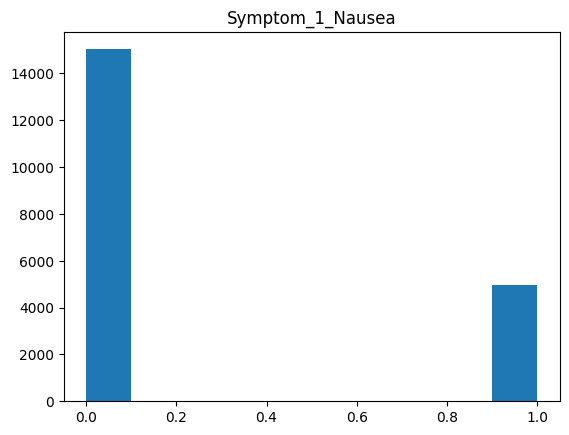

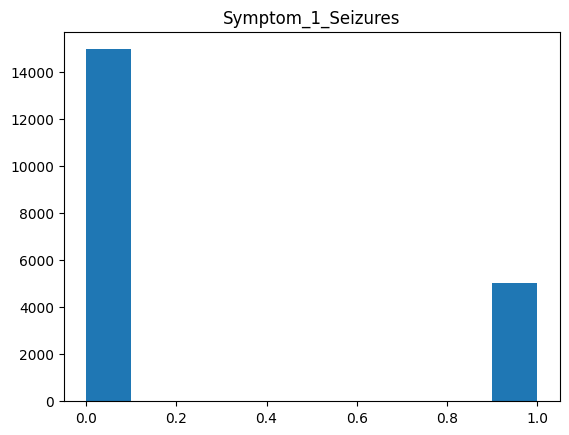

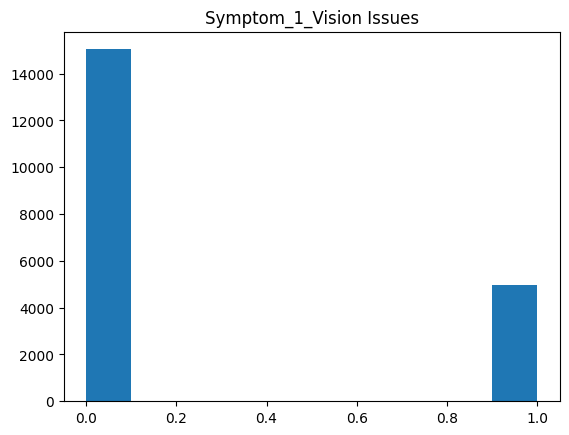

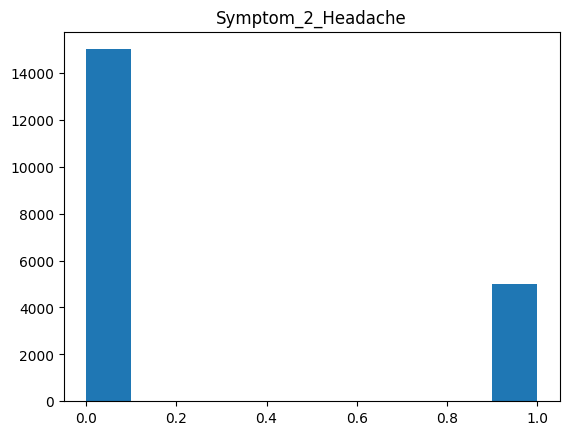

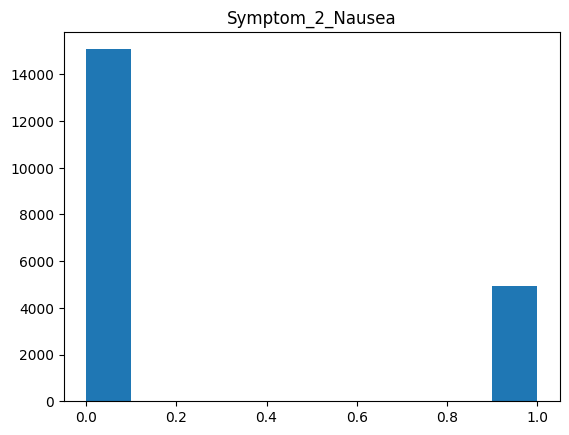

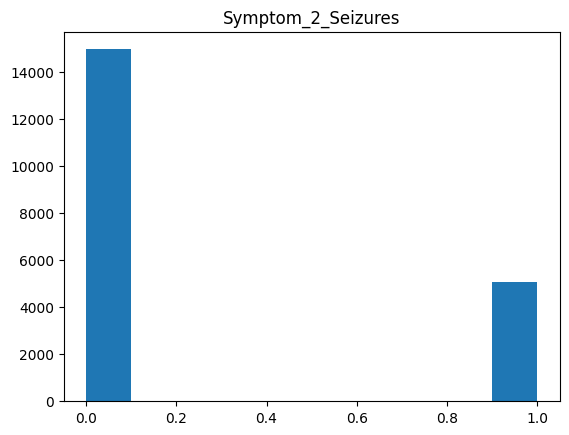

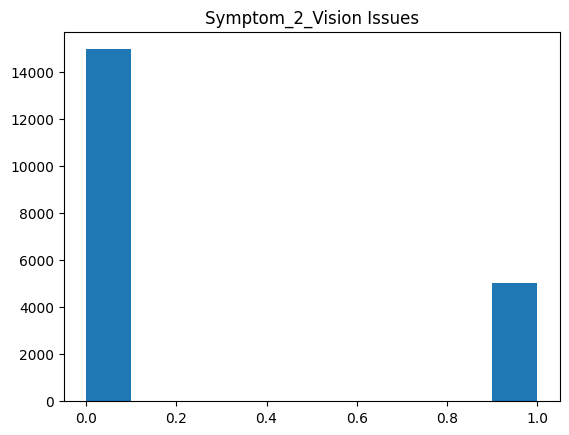

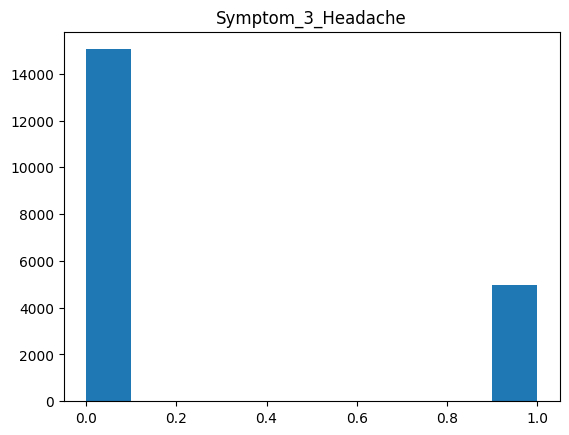

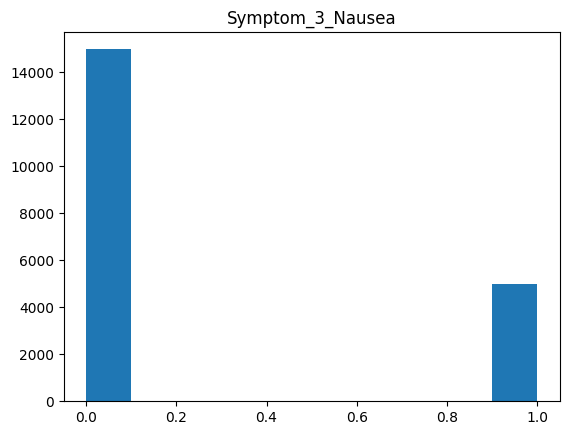

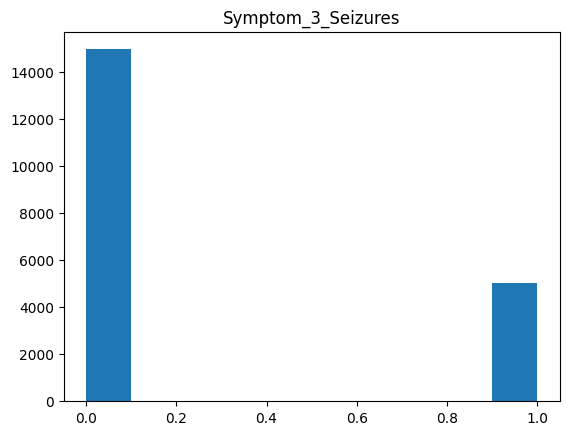

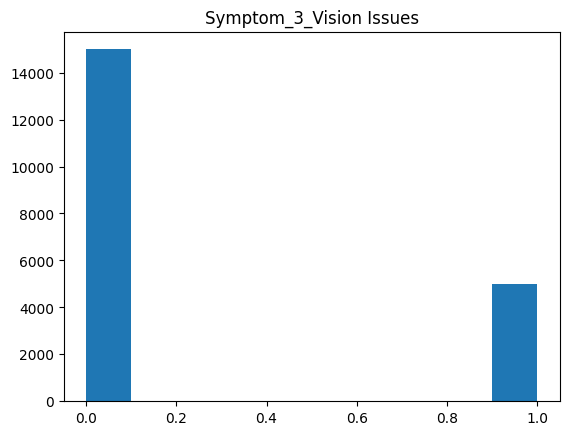

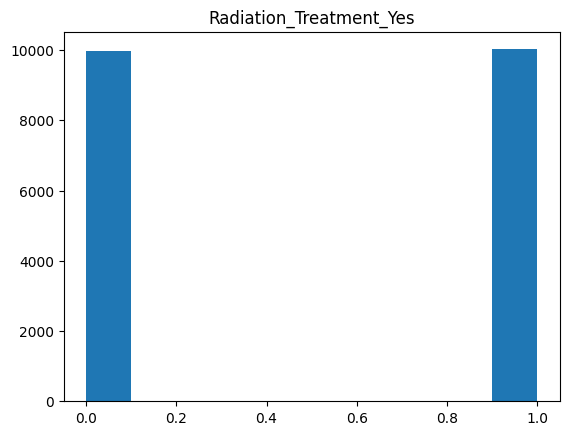

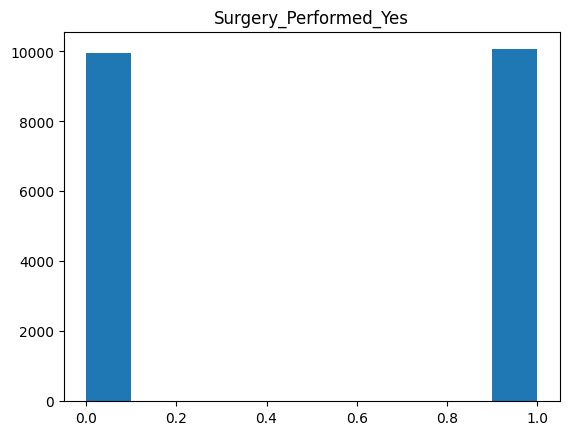

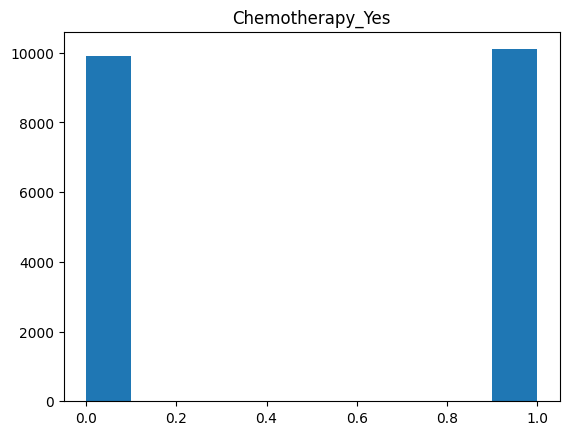

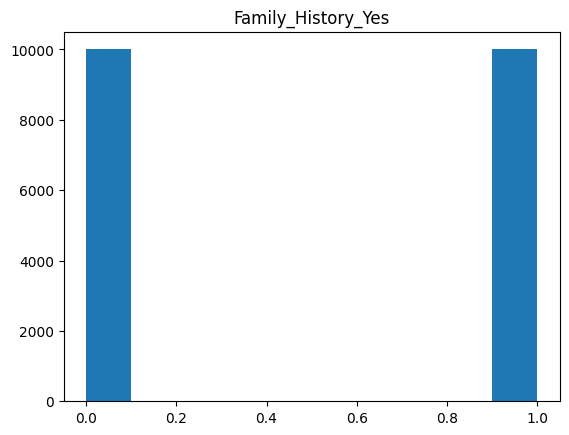

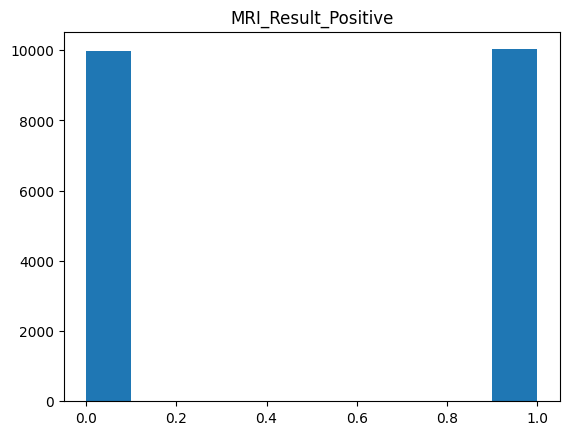

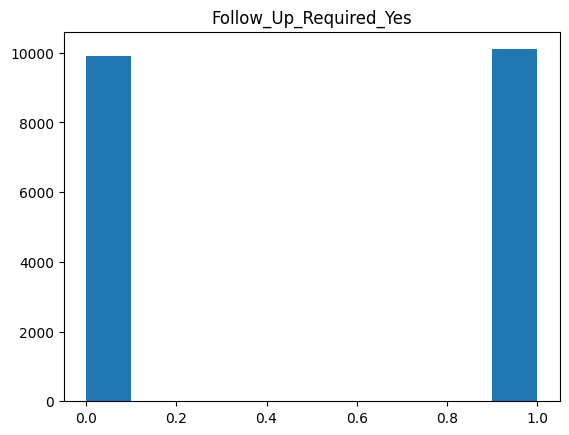

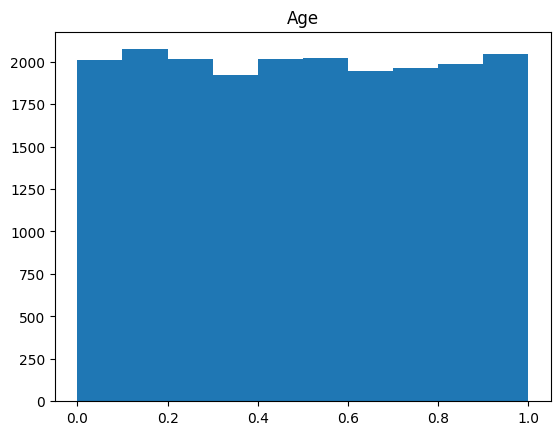

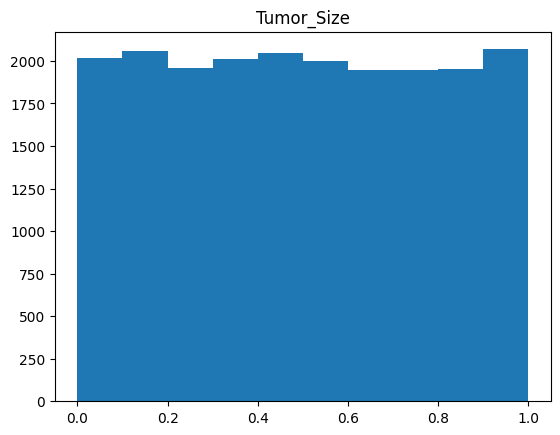

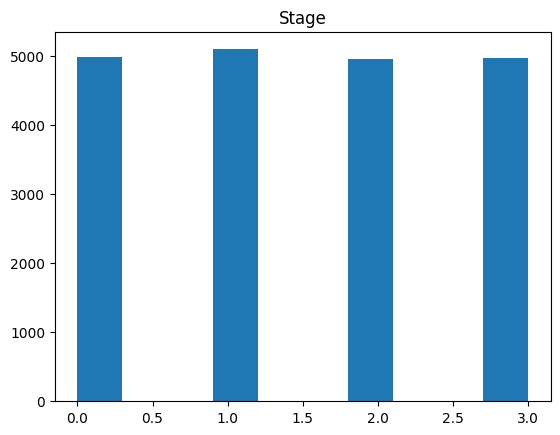

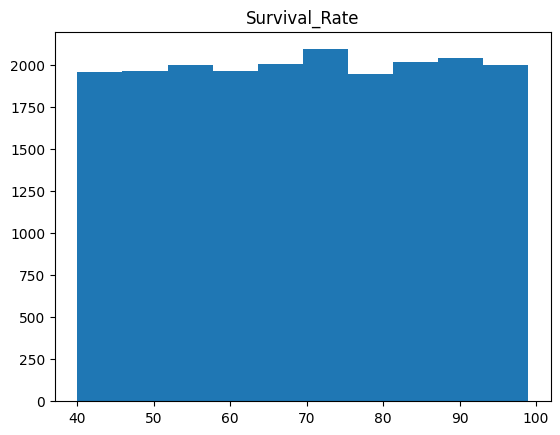

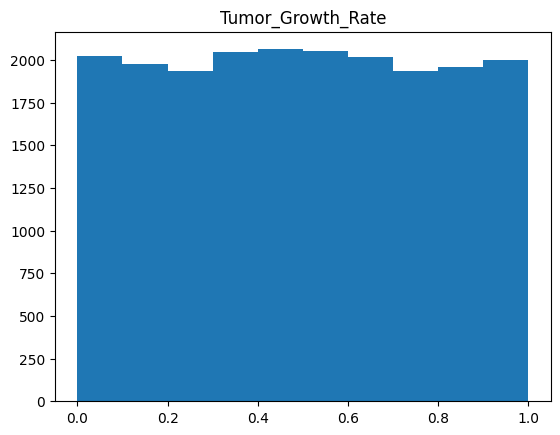

In [54]:
for col in X_tumor.columns:
  plt.hist(X_tumor[col], bins=10)
  plt.title(col)
  plt.show()